## Random Forest Optimization 

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path
path = r'C:\Users\Lukman\Desktop\FEMINA CF\Machine Learning'

In [5]:
# Import data
climate = pd.read_csv(os.path.join(path, 'Datasets','climate_cleaned_with_date.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,0.67,1.0180,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,6,0.72,1.0180,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017

In [6]:
#Read in the pleasant weather data.
df = pd.read_csv(os.path.join(path,'Datasets','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data Wrangling

In [7]:
# Reduce observations dataset to 2010's

climate2010= climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate2010.shape

(3652, 137)

In [8]:
# Filter pleasant dataset to 2010s
pleasant_2010 = df[df['DATE'].astype(str).str.startswith('201')] 
pleasant_2010

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
climate2010_2 = climate2010.drop(columns=['DATE', 'MONTH'])

# Check shape
climate2010_2.shape

(3652, 135)

In [10]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010_2 = pleasant_2010.drop(columns=['DATE'])

# Check shape
pleasant_2010_2.shape

(3652, 15)

In [11]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2010_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [12]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [13]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [14]:
# Check shape
y_1.shape

(3652,)

In [15]:
# Create X matrix
X_1 = climate2010_2.to_numpy()

In [16]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


### 4. Split Data

In [17]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [18]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


### 5. Hyperparameter Optimization

#### Grid Search

In [19]:
# Create a RF classifier

clf = RandomForestClassifier()

In [20]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [21]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 101.29634575843811 minutes


In [22]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 135, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 0.9806498722161372


### Random Search

In [23]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [24]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [25]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 2.595793863137563 minutes


In [26]:
# Random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 70, 'max_features': 129, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 0.9828404527199708


In [27]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 135, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 0.9806498722161372
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 70, 'max_features': 129, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 0.9828404527199708


In [47]:

# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=None, max_features=56, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train_1, y_train_1)

RandomForestClassifier(max_features=56, n_estimators=150)

In [48]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test_1)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred))

Model Accuracy:  0.9824753559693319


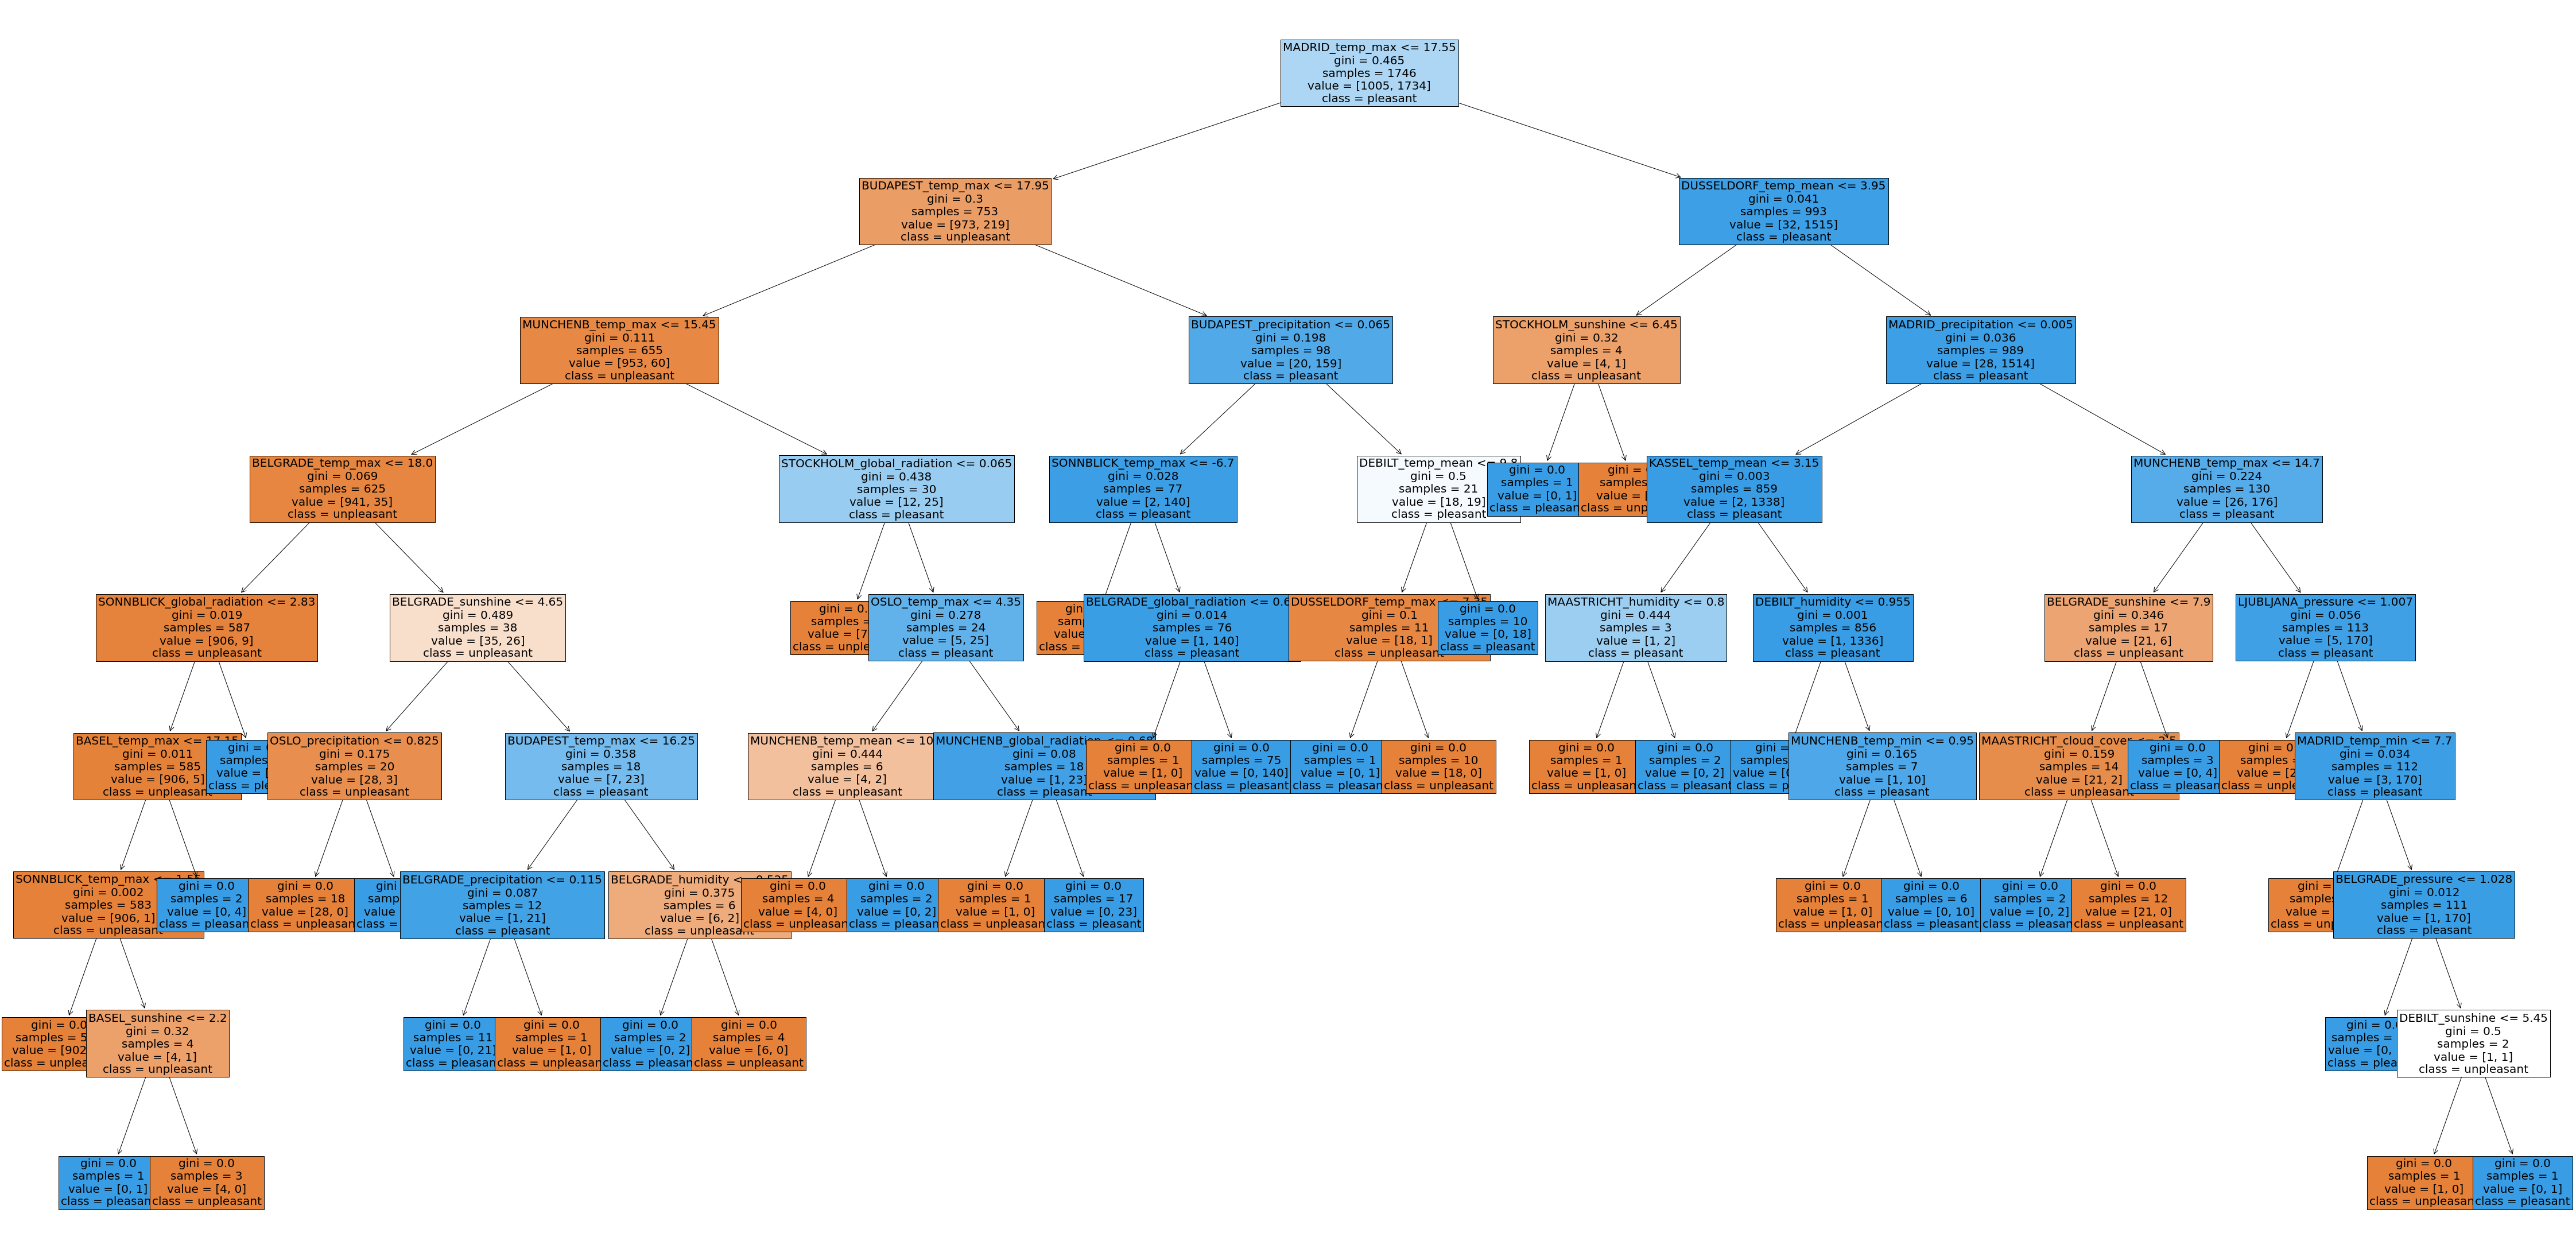

In [53]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = climate2010_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [54]:
fig.savefig(os.path.join(path,'optimized_random_forest_2010s.png'), bbox_inches='tight')

## Uncovering Feature Importances

In [55]:
#np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.24185867e-04, 4.55661308e-04, 5.71407036e-04, 4.38716872e-04,
       3.49876900e-04, 4.38217010e-04, 1.96676611e-02, 6.24556460e-04,
       8.20297886e-03, 1.11522174e-03, 9.12339973e-04, 1.85323265e-03,
       9.88799434e-04, 1.17523086e-02, 2.41598066e-03, 9.08895951e-03,
       7.51913683e-04, 3.23520451e-02, 1.46801037e-04, 0.00000000e+00,
       0.00000000e+00, 8.02772487e-04, 1.11751791e-03, 8.59750048e-04,
       2.72988065e-02, 1.11688879e-03, 5.81060824e-02, 1.73440719e-04,
       5.54918698e-04, 3.51436712e-04, 9.47457194e-04, 3.09663324e-04,
       5.04128096e-04, 2.13337261e-03, 8.08657259e-04, 2.24935053e-02,
       2.17436396e-04, 5.41418383e-04, 5.26154538e-04, 5.56997462e-04,
       4.66179485e-04, 3.18564157e-04, 2.77180841e-03, 6.01361075e-04,
       9.28755856e-03, 2.27565741e-04, 5.07435022e-04, 3.71362709e-04,
       1.01174305e-03, 2.85103208e-04, 7.09065809e-04, 1.71081550e-03,
       5.22802501e-04, 2.63442965e-03, 1.23298055e-04, 2.82303309e-04,
      

In [56]:
#np.set_printoptions(threshold=1000)

In [58]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.24185867e-04, 4.55661308e-04, 5.71407036e-04, 4.38716872e-04,
         3.49876900e-04, 4.38217010e-04, 1.96676611e-02, 6.24556460e-04,
         8.20297886e-03],
        [1.11522174e-03, 9.12339973e-04, 1.85323265e-03, 9.88799434e-04,
         1.17523086e-02, 2.41598066e-03, 9.08895951e-03, 7.51913683e-04,
         3.23520451e-02],
        [1.46801037e-04, 0.00000000e+00, 0.00000000e+00, 8.02772487e-04,
         1.11751791e-03, 8.59750048e-04, 2.72988065e-02, 1.11688879e-03,
         5.81060824e-02],
        [1.73440719e-04, 5.54918698e-04, 3.51436712e-04, 9.47457194e-04,
         3.09663324e-04, 5.04128096e-04, 2.13337261e-03, 8.08657259e-04,
         2.24935053e-02],
        [2.17436396e-04, 5.41418383e-04, 5.26154538e-04, 5.56997462e-04,
         4.66179485e-04, 3.18564157e-04, 2.77180841e-03, 6.01361075e-04,
         9.28755856e-03],
        [2.27565741e-04, 5.07435022e-04, 3.71362709e-04, 1.01174305e-03,
         2.85103208e-04, 7.09065809e-04, 1.71081550e-03, 5.22802501

In [59]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.03107326, 0.0612308 , 0.08944862, 0.02827658, 0.01528748,
       0.00798032, 0.00331894, 0.24650197, 0.00851392, 0.4683556 ,
       0.01700643, 0.00769633, 0.00582813, 0.00797265, 0.00150895])

In [60]:
# Extract stations list

stations = [col.split('_')[0] for col in climate2010_2.columns if '_' in col]

In [61]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [62]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [63]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

VALENTIA      0.468356
BUDAPEST      0.246502
SONNBLICK     0.089449
STOCKHOLM     0.061231
MUNCHENB      0.031073
HEATHROW      0.028277
MADRID        0.017006
BASEL         0.015287
OSLO          0.008514
DEBILT        0.007980
KASSEL        0.007973
DUSSELDORF    0.007696
LJUBLJANA     0.005828
BELGRADE      0.003319
MAASTRICHT    0.001509
dtype: float64

In [64]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MUNCHENB', 'STOCKHOLM', 'SONNBLICK', 'HEATHROW', 'BASEL', 'DEBILT', 'BELGRADE', 'BUDAPEST', 'OSLO', 'VALENTIA', 'MADRID', 'DUSSELDORF', 'LJUBLJANA', 'KASSEL', 'MAASTRICHT']


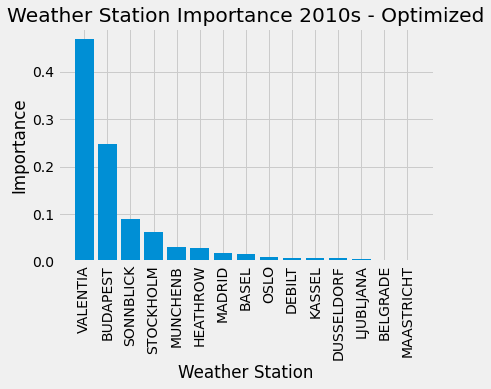

In [65]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path,'optimized_featureimportance_2010s.png'), bbox_inches='tight')

plt.show()

## Random Forest for Valentia Data (all years)

In [67]:
# Filter weather dataset to only include valentia
df_valentia = climate[climate.columns[climate.columns.astype(str).str.startswith('VALENTIA')]]
df_valentia

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...
22945,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [68]:
# Filter pleasant dataset to only include Madrid
pleasant_valentia = df[df.columns[df.columns.astype(str).str.startswith('VALENTIA')]]

pleasant_valentia

,VALENTIA_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [69]:
# Create matrices
y2 = pleasant_valentia.max(axis=1)

y2.shape

(22950,)

In [70]:
# Ensure y has the correct shape
y2 = y2.to_numpy().reshape(-1)


y2.shape

(22950,)

In [71]:
# Create X matrix
X2 = df_valentia.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [72]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [73]:
X.shape

(22950, 9)

In [74]:
y.shape

(22950,)

In [75]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [77]:
X_train

array([[ 6.    ,  0.83  ,  1.0082, ..., 15.6   , 13.7   , 17.6   ],
       [ 5.    ,  0.82  ,  1.0142, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.9   ,  1.0186, ...,  1.    , -3.9   ,  5.9   ],
       ...,
       [ 6.    ,  0.74  ,  1.023 , ...,  9.6   ,  7.8   , 11.5   ],
       [ 7.    ,  0.86  ,  1.0124, ..., 11.1   ,  8.5   , 13.7   ],
       [ 7.    ,  0.8   ,  1.0242, ...,  9.6   ,  6.1   , 13.    ]])

In [78]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
X_test

array([[ 5.    ,  0.82  ,  1.0142, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.84  ,  0.9842, ...,  5.8   ,  3.3   ,  8.4   ],
       [ 7.    ,  0.84  ,  1.004 , ..., 16.6   , 15.1   , 18.1   ],
       ...,
       [ 7.    ,  0.9   ,  1.0064, ..., 13.6   , 10.7   , 16.6   ],
       [ 6.    ,  0.88  ,  1.029 , ...,  9.3   ,  6.4   , 12.2   ],
       [ 4.    ,  0.82  ,  1.0235, ..., 11.2   ,  6.8   , 15.7   ]])

In [80]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Hyperparameter Optimization

### Grid Search

In [81]:
# Create a RF classifier

clf = RandomForestClassifier()

In [82]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [83]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 4.127209091186524 minutes


In [84]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


### Random Search

In [85]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [86]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [87]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 3.139647356669108 minutes


In [88]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 250}
Best RANDOM search score is: 0.9999419111240198


In [89]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 250}
Best RANDOM search score is: 0.9999419111240198


### Running Random Forest with Optimized Search Parameters

In [90]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 250, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=250)

In [91]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


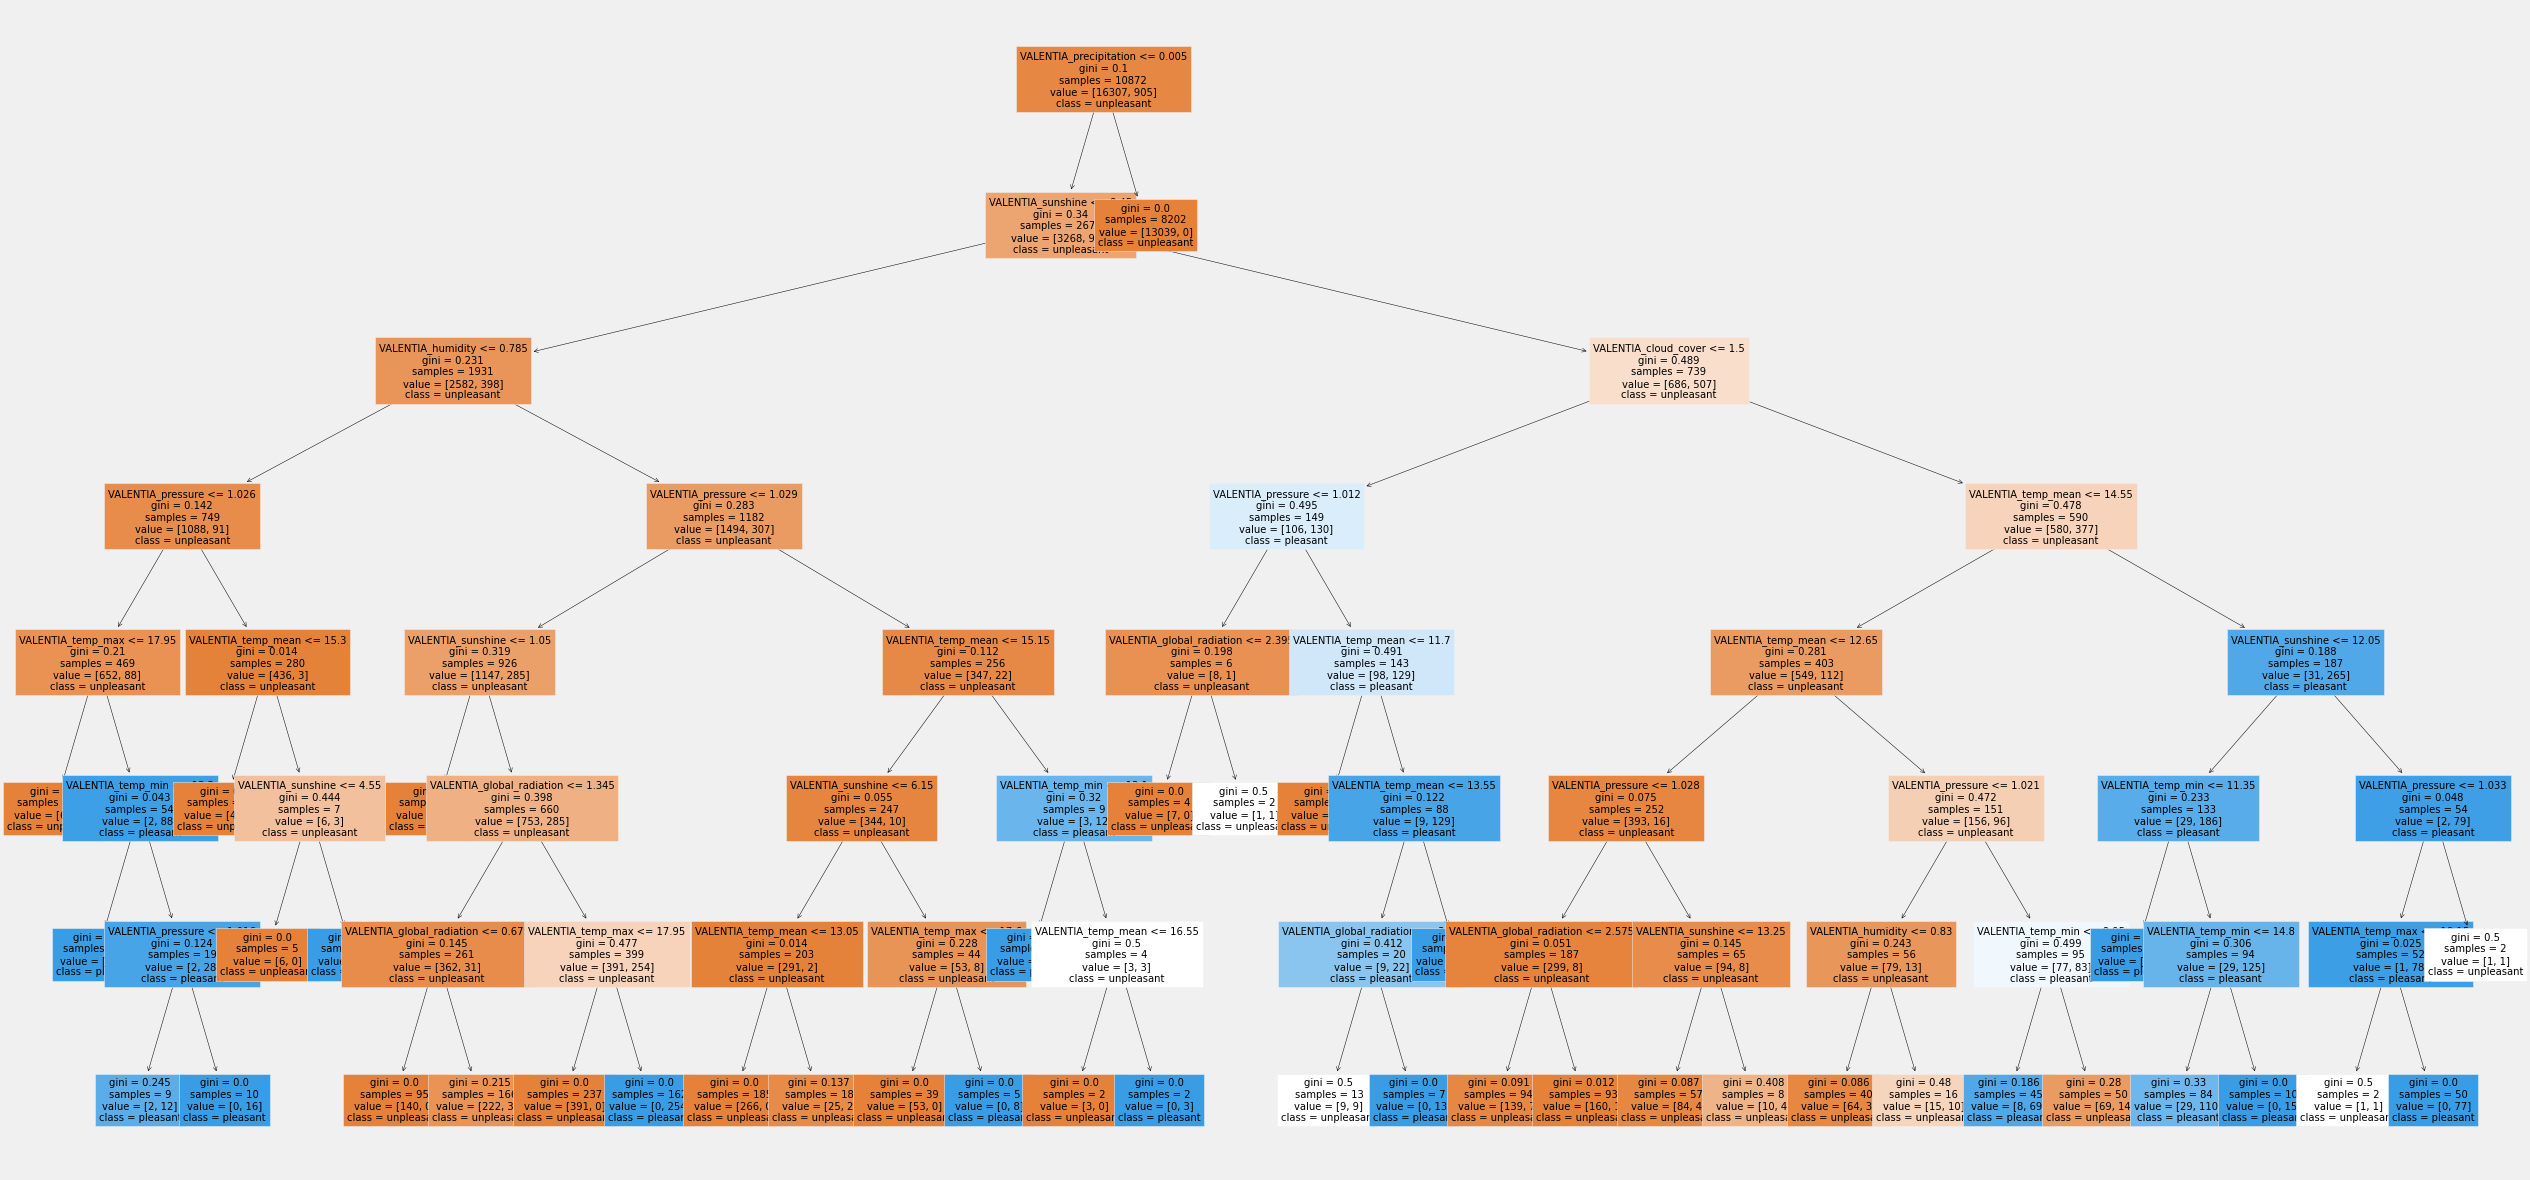

In [93]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_valentia.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [94]:
fig.savefig(os.path.join(path,'optimized_random_forest_valentia.png'),bbox_inches='tight')

### Uncovering Feature Importances

In [95]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.04734451, 0.00958718, 0.02837157, 0.04645645, 0.21631589,
       0.09040761, 0.12599849, 0.04042471, 0.39509358])

In [96]:
# Retrieve feature importances from the trained model
mad_importance = clf3.feature_importances_
print("Feature Importances:", mad_importance)
print(mad_importance.shape)

Feature Importances: [0.04734451 0.00958718 0.02837157 0.04645645 0.21631589 0.09040761
 0.12599849 0.04042471 0.39509358]
(9,)


In [97]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [98]:
# Create a dataframe to associate observation measurements with their importances
mad_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': mad_importance
})

In [99]:
# Sort by importance for chart readability
mad_importance = mad_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(mad_importance)

Feature Importance:
        Measurement  Importance
8          temp_max    0.395094
4     precipitation    0.216316
6         temp_mean    0.125998
5          sunshine    0.090408
0       cloud_cover    0.047345
3  global_radiation    0.046456
7          temp_min    0.040425
2          pressure    0.028372
1          humidity    0.009587


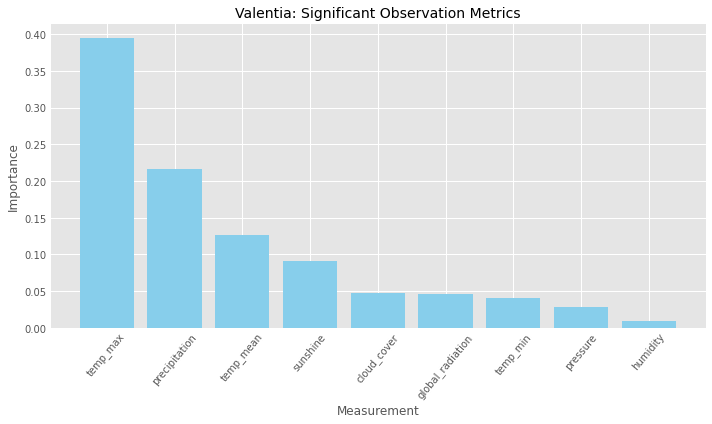

In [101]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(mad_importance['Measurement'], mad_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Valentia: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()